In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-ratings/ratings_Beauty.csv


In [5]:
#Kütüphane Yükleme
import matplotlib.pyplot as plt
import seaborn as sns
# Python'da uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

# Keşifsel Veri Analizi (EDA)

*Amaç: Veri setinin genel yapısını ve özelliklerini anlamak.*

**Veri Setini Yükleme**

In [6]:
df = pd.read_csv('/kaggle/input/amazon-ratings/ratings_Beauty.csv')
#Veri Seti Hakkın df.info() ie bilgi alma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


**Veri Seti Özeti**
*Sütunlar:*
* UserId (Kullanıcı Kimliği) - Object
* ProductId (Ürün Kimliği) - Object
* Rating (Puan) - Float64 (Hedef Değişken)
* Timestamp (Zaman Damgası) - Int64

In [7]:
#Veri Setinin İlk Birkaç Satırını Görüntüleme
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [8]:
#Veri Seti ile ilgili Temel İstatistikler
df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [9]:
#Eksik Verileri Kontrol Etme
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

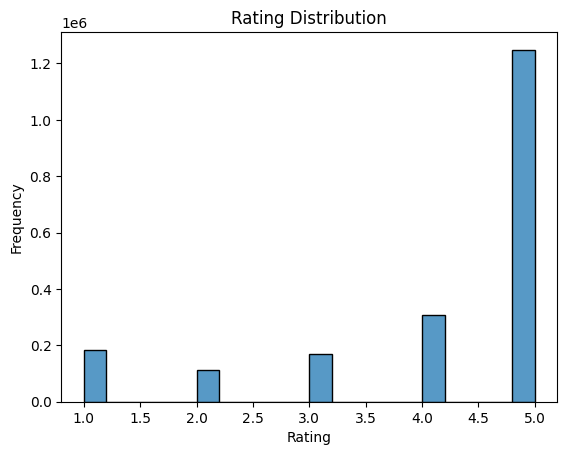

In [10]:
# Rating dağılımını görselleştirme
sns.histplot(df['Rating'], bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Veri Ön İşleme
**Amaç: Veriyi temizlemek ve modelleme için hazırlamak.**

In [11]:
#Kütüphanelerin Eklenmesi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
# Kategorik verilerin encode edilmesi
le_user = LabelEncoder()
df['UserId'] = le_user.fit_transform(df['UserId'])

le_product = LabelEncoder()
df['ProductId'] = le_product.fit_transform(df['ProductId'])

In [13]:
# Özellik mühendisliği: Zaman damgasından tarih bileşenlerini çıkarma
df['Year'] = pd.to_datetime(df['Timestamp'], unit='s').dt.year
df['Month'] = pd.to_datetime(df['Timestamp'], unit='s').dt.month
df['Day'] = pd.to_datetime(df['Timestamp'], unit='s').dt.day

In [27]:
# Kullanıcı başına ortalama puan
df['UserAvgRating'] = df.groupby('UserId')['Rating'].transform('mean')

# Ürün başına ortalama puan
df['ProductAvgRating'] = df.groupby('ProductId')['Rating'].transform('mean')

# Bağımsız değişkenler ve hedef değişkeni güncelleme
X = df[['UserId', 'ProductId', 'Year', 'Month', 'Day', 'UserAvgRating', 'ProductAvgRating']]
y = df['Rating']

In [28]:
# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özelliklerin ölçeklenmesi (Opsiyonel)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gözetimli Öğrenme
**Amaç: Tahminler yapmak için model eğitmek.**

In [29]:
#Kütüphanelerin Eklenmesi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:


# Modelin tanımlanması ve eğitilmesi
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Tahminler
y_pred = model.predict(X_test_scaled)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.45242033632031187
Root Mean Squared Error: 0.6726219862005046
R² Score: 0.7373655807648538



---

### **Sonuçların Açıklaması**

#### **Mean Squared Error (MSE): 0.4524**
Mean Squared Error (MSE), modelimizin tahminleri ile gerçek değerler arasındaki farkların karelerinin ortalamasını ölçer. Yani, tahminlerimizle gerçek değerler arasındaki hataların büyüklüğünü anlamamıza yardımcı olur. Senin MSE'n 0.4524, modelimizin genel olarak düşük bir hata payına sahip olduğunu gösteriyor. Bu, tahminlerimizin gerçek değerlere oldukça yakın olduğu anlamına geliyor. MSE'nin düşük olması, modelimizin veri üzerinde başarılı bir şekilde çalıştığını işaret ediyor.

#### **Root Mean Squared Error (RMSE): 0.6726**
Root Mean Squared Error (RMSE), MSE'nin karekökünü alarak tahminlerimizle gerçek değerler arasındaki ortalama hatayı daha anlaşılır bir biçimde sunar. Bu metriğin avantajı, hata miktarının veri setindeki orijinal birimde ifade edilmesidir. RMSE'nizin 0.6726 olması, modelimizin tahminlerinde ortalama olarak bu büyüklükte bir hata yaptığını gösteriyor. Kısacası, tahminlerimiz genellikle gerçek değerlere yakın, ama bazı hatalar mevcut.

#### **R² Score: 0.7374**
R² skoru, modelimizin hedef değişken üzerindeki varyansın ne kadarını açıkladığını gösterir. Yüksek bir R² skoru, modelimizin veriye iyi uyduğunu ve tahminlerde başarılı olduğunu ifade eder. R²'nizin 0.7374 olması, modelimizin hedef değişkenin yaklaşık %74'ünü başarılı bir şekilde açıkladığını ve genel olarak güçlü bir performans sergilediğini gösteriyor. Bu, modelimizin veri üzerindeki açıklama gücünün yüksek olduğunu ve tahminlerimizin gerçek değerlere oldukça yakın olduğunu ortaya koyuyor.

### **Özet**
Genel olarak, model oldukça iyi performans gösteriyor. Tahminlerin doğruluğu yüksek ve hatalar küçük. Bu, modelin veri üzerindeki açıklama gücünün güçlü olduğunu ve tahminlerin güvenilir olduğunu gösteriyor.


# Gözetimsiz Öğrenme
**Amaç: Veriyi kümelere ayırmak veya yapısal özelliklerini keşfetmek**

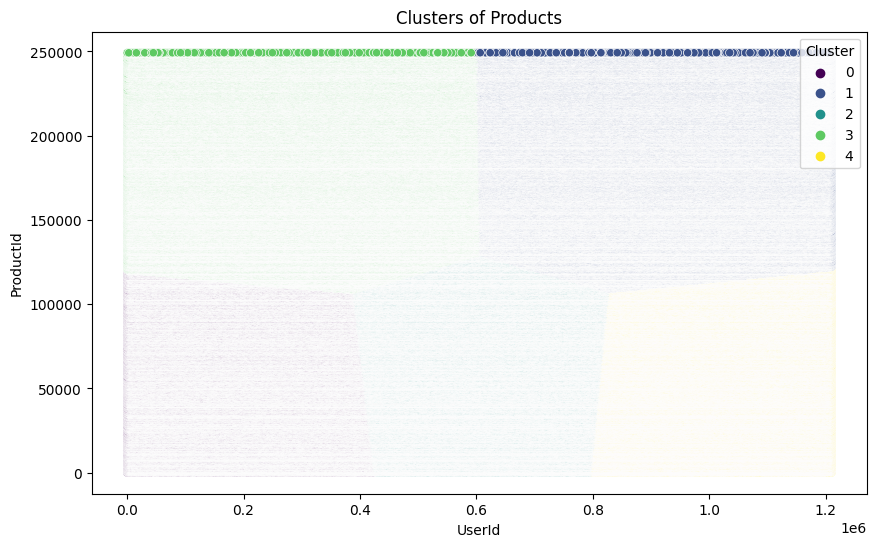

In [8]:
#Kütüphanelerin eklenmesi
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

df = pd.read_csv('/kaggle/input/amazon-ratings/ratings_Beauty.csv')
# Özellik mühendisliği ve ön işleme
le_user = LabelEncoder()
df['UserId'] = le_user.fit_transform(df['UserId'])

le_product = LabelEncoder()
df['ProductId'] = le_product.fit_transform(df['ProductId'])

# Özelliklerin ayrılması ve ölçekleme
X = df[['UserId', 'ProductId']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# K-Means Kümeleme
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UserId', y='ProductId', hue='Cluster', palette='viridis', data=df)
plt.title('Clusters of Products')
plt.xlabel('UserId')
plt.ylabel('ProductId')
plt.legend(title='Cluster', loc='upper right')  # Legend konumunu belirleyin
plt.show()